# **Clinical Decision-Making Support System TriageAssist**

## **Ethical AI Audit** conducted by **Miguel Ángel Carrillo Cobian** and **Leah Davis**

## Data Analysis

In [ ]:
# Run only if using google colab
from google.colab import drive
drive.mount('/content/drive')

!pip install aif360

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Load the dataset
file_path = "/content/heart.csv"  # Make sure to add the correct path
df = pd.read_csv(file_path)

# Show first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Dataset summary
print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
display(df.describe())


First 5 rows of the dataset:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Summary Statistics:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Lato font not found. Downloading...
Lato font downloaded.

Plotting numerical feature distributions...


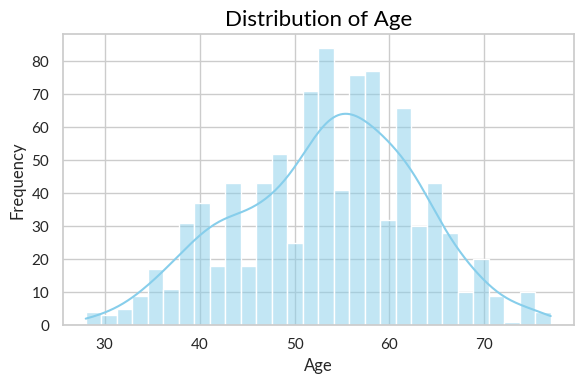

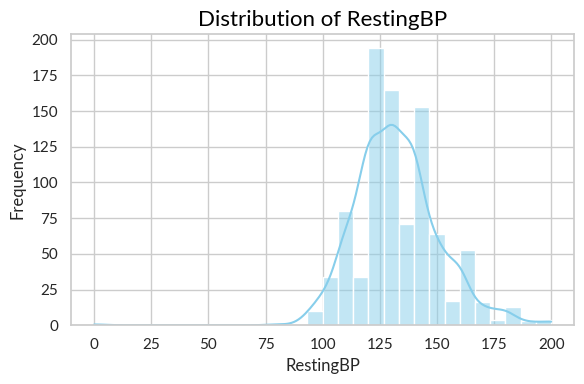

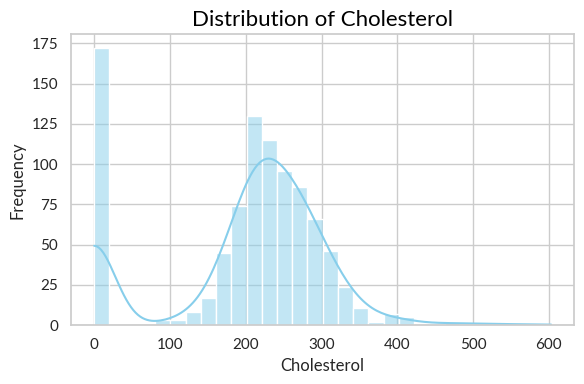

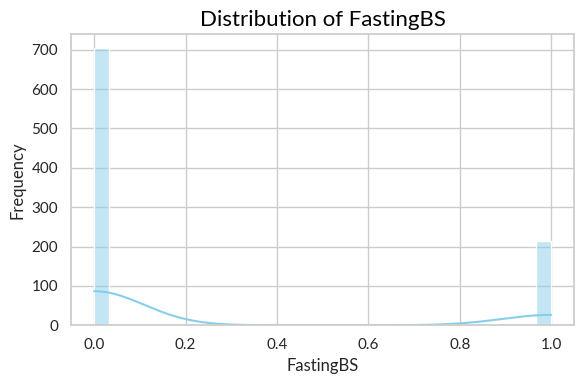

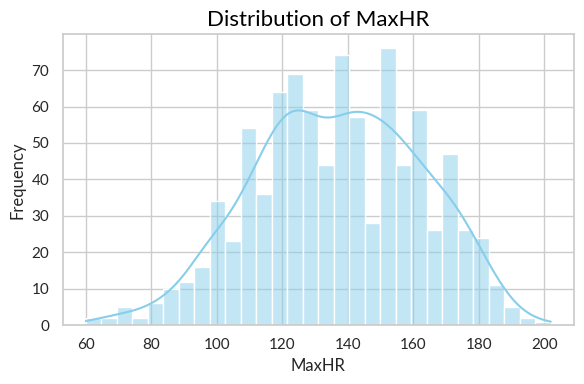

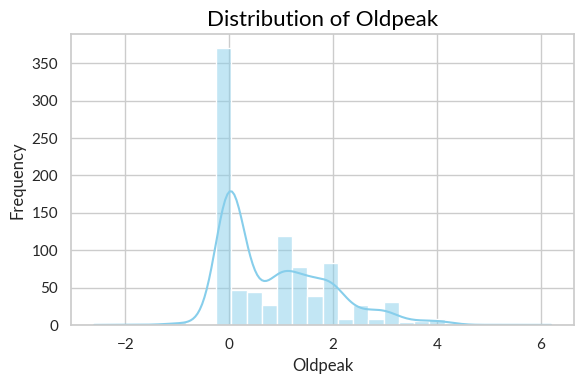

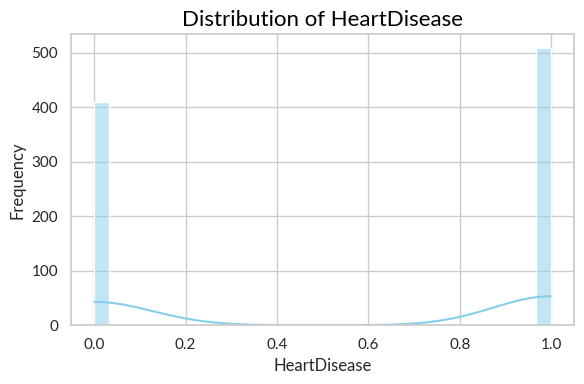


Plotting categorical feature distributions...


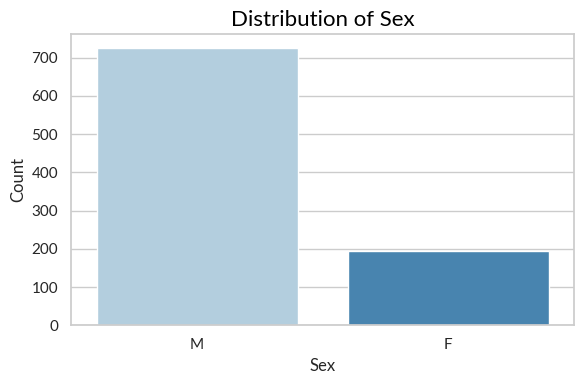

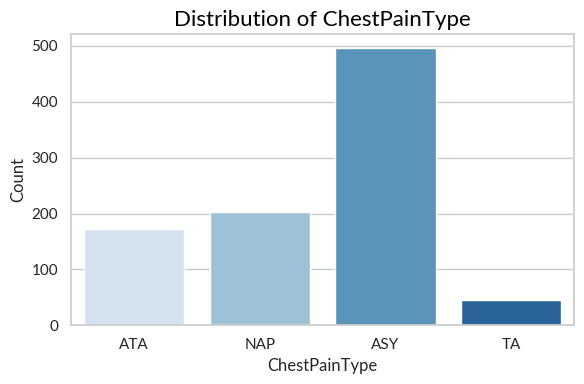

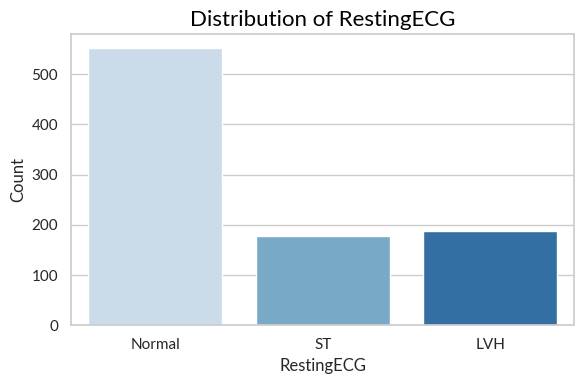

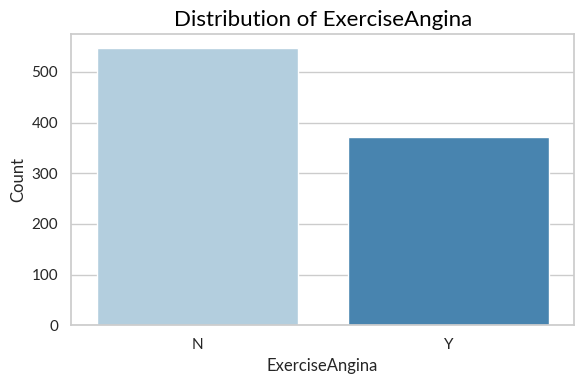

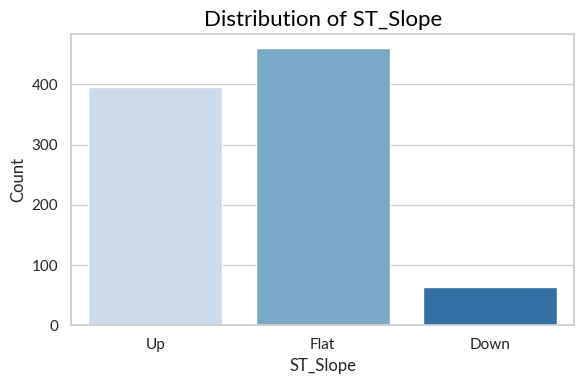

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from pathlib import Path
import urllib.request

# Function to download and set Lato font if not available
def set_lato_font():
    font_path = Path("Lato-Regular.ttf")
    if not font_path.is_file():
        print("Lato font not found. Downloading...")
        url = "https://fonts.google.com/download?family=Lato"
        urllib.request.urlretrieve("https://github.com/google/fonts/raw/main/ofl/lato/Lato-Regular.ttf", font_path)
        print("Lato font downloaded.")
    fm.fontManager.addfont(str(font_path))
    plt.rcParams['font.family'] = 'Lato'

# Set Lato font
set_lato_font()

# Plot distribution of each numerical feature
print("\nPlotting numerical feature distributions...")
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=16, color='black', weight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot distribution of categorical features (if any)
print("\nPlotting categorical feature distributions...")
cat_columns = df.select_dtypes(include=['object']).columns

for col in cat_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue=col, palette='Blues', dodge=False)
    plt.title(f'Distribution of {col}', fontsize=16, color='black', weight='bold')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


In [6]:
print(f"Original dataset shape: {df.shape}")

# Drop rows with any missing values
df = df.dropna()

# Drop rows where cholesterol is zero
df = df[df['Cholesterol'] != 0]

# Reset index after drops
df = df.reset_index(drop=True)

# Show shape after cleaning
print(f"Cleaned dataset shape: {df.shape}")


Original dataset shape: (918, 12)
Cleaned dataset shape: (746, 12)


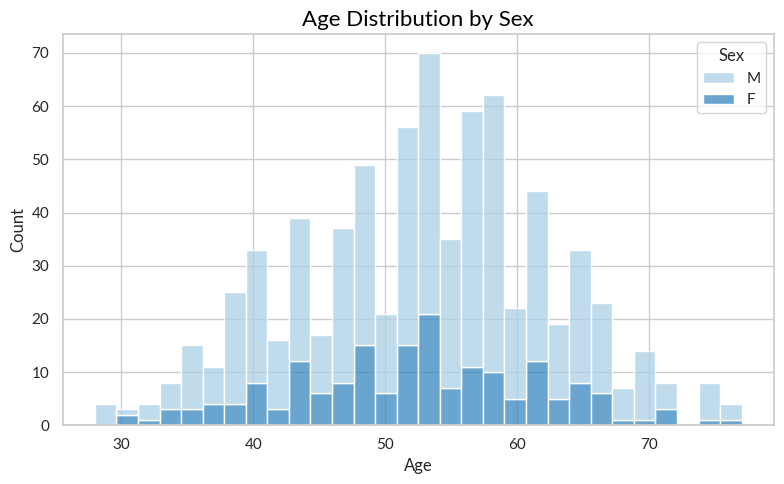

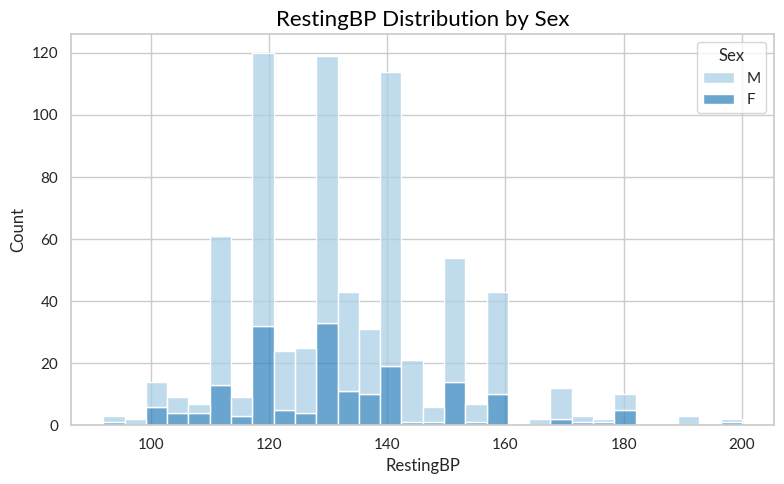

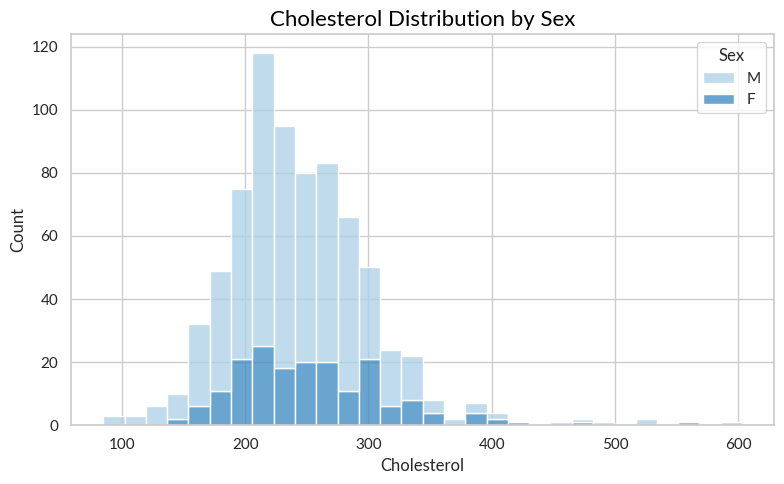

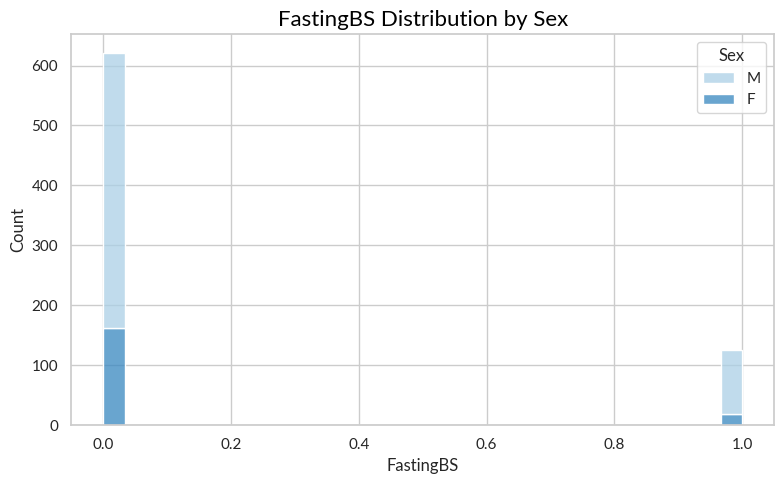

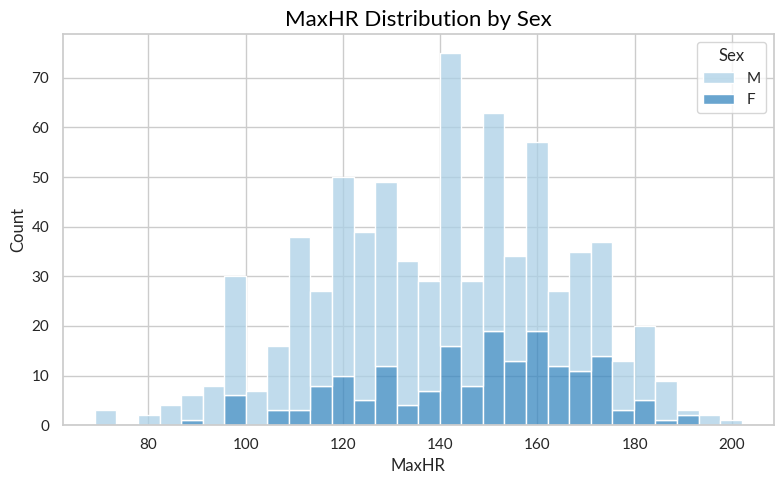

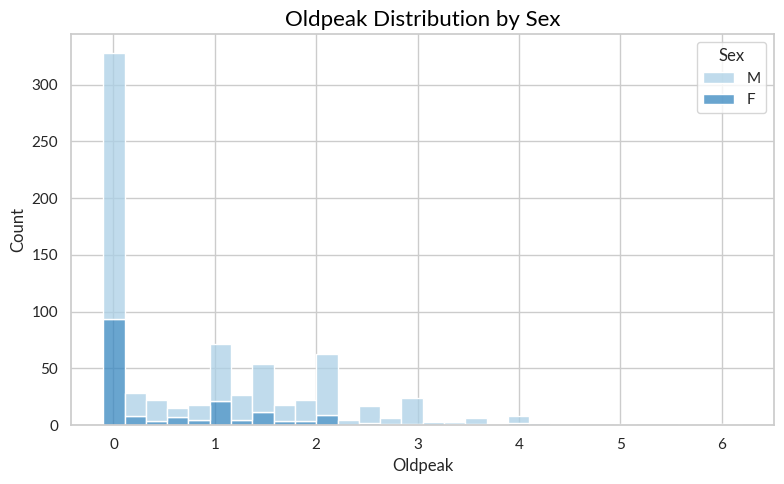

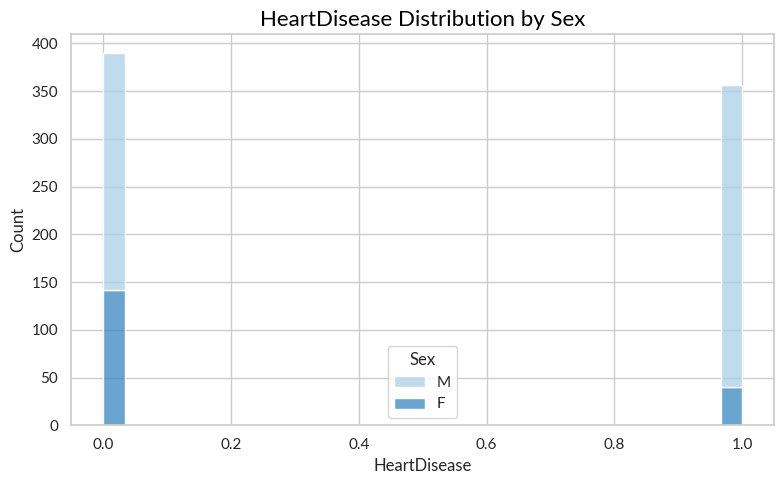

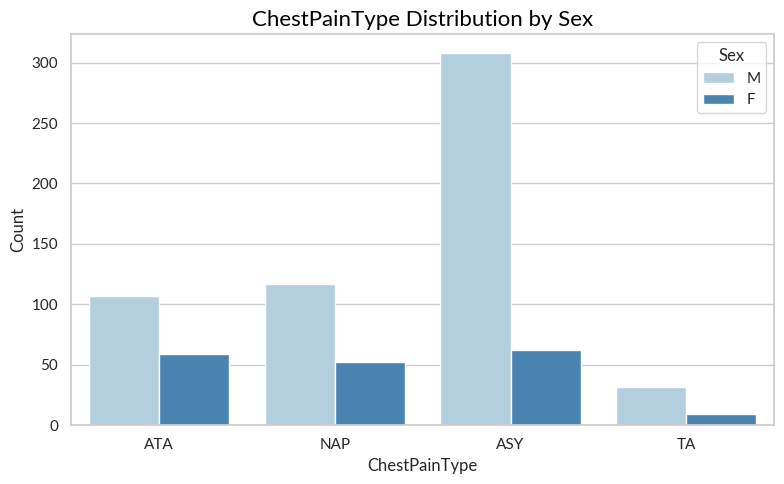

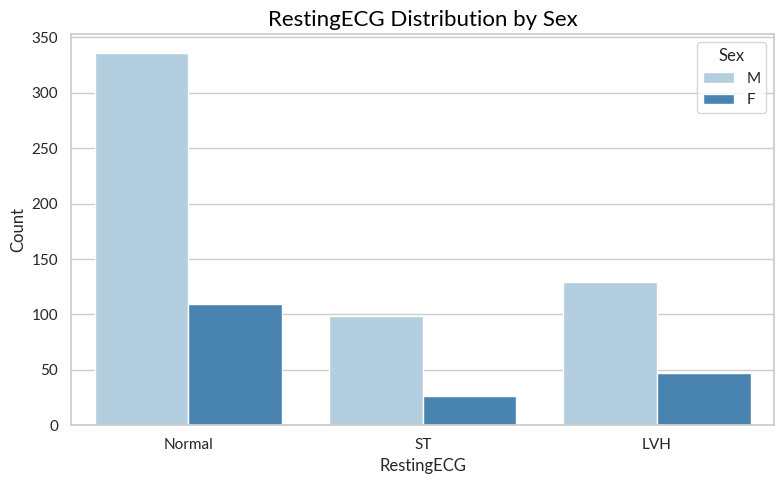

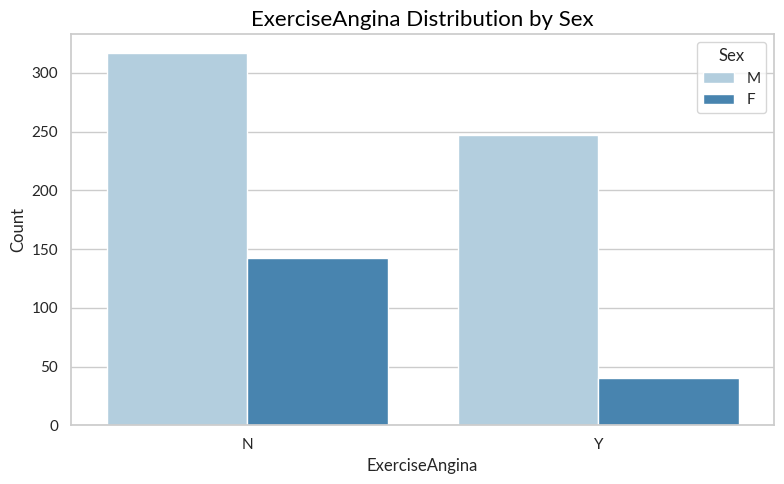

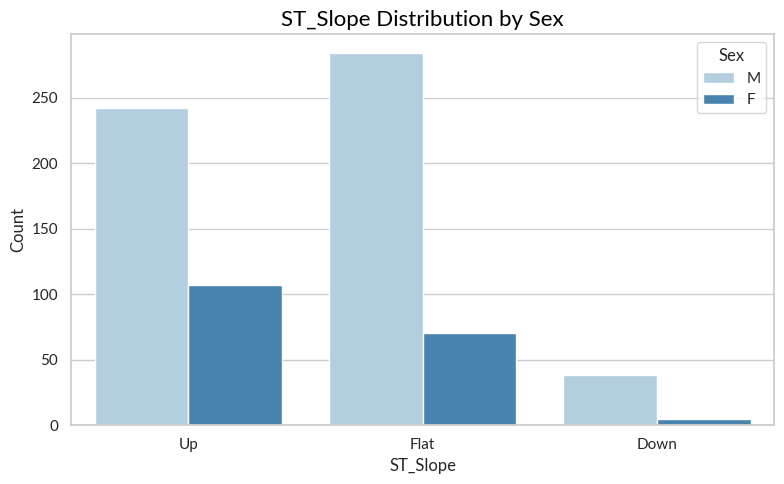

In [7]:
# Get numerical and categorical columns (excluding 'Sex' itself from features)
num_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('Sex', errors='ignore')
cat_columns = df.select_dtypes(include=['object']).columns.drop('Sex', errors='ignore')

# Plot numerical feature distributions by Sex
for col in num_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(
        data=df,
        x=col,
        hue='Sex',
        bins=30,
        multiple='stack',
        palette='Blues',
    )
    plt.title(f'{col} Distribution by Sex', fontsize=16, color='black', weight='bold')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Plot categorical feature distributions by Sex
for col in cat_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        data=df,
        x=col,
        hue='Sex',
        palette='Blues'
    )
    plt.title(f'{col} Distribution by Sex', fontsize=16, color='black', weight='bold')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


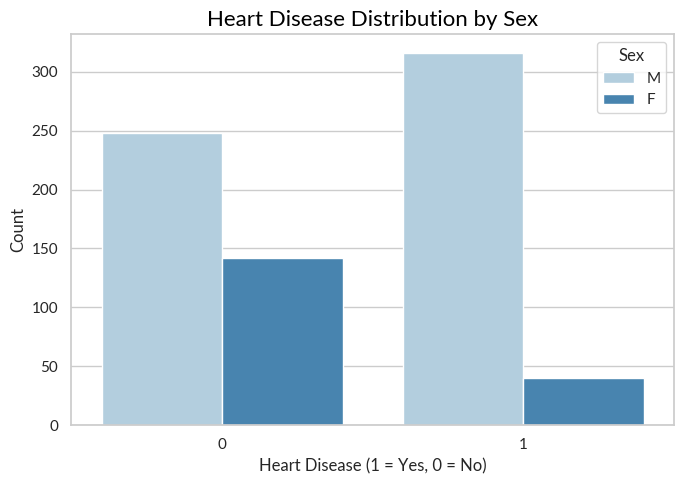

Percentage of Heart Disease by Sex:
Sex               F      M
HeartDisease              
0             78.02  43.97
1             21.98  56.03


In [8]:
set_lato_font()

# Countplot of HeartDisease by Sex
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='HeartDisease', hue='Sex', palette='Blues')
plt.title('Heart Disease Distribution by Sex',fontsize=16, color='black', weight='bold')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Crosstab of HeartDisease and Sex
hd_by_sex = pd.crosstab(df['HeartDisease'], df['Sex'], normalize='columns') * 100

print("Percentage of Heart Disease by Sex:")
print(hd_by_sex.round(2))


## Creation Of Models & Subgroup Testing

Models:
+ Logistic Regression: Linear, interpretable
+ Random Forest: Tree-based, robust
+ KNN: Distance-based
+ Naive Bayes: Probabilistic
+ SVM: Margin-based, flexible

Summary Metrics:


,Model,Mean Accuracy,Mean General TPR,Mean Male TPR,Mean Female TPR,Mean EOD (Male - Female),Std Accuracy,Std General TPR,Std Male TPR,Std Female TPR,Std EOD (Male - Female)
0,Logistic Regression,0.861903,0.870810,0.892635,0.692460,0.200175,0.021703,0.048394,0.048991,0.124890,0.116600
1,Random Forest,0.855151,0.862147,0.882771,0.699405,0.183367,0.025807,0.043278,0.033574,0.209372,0.199069
2,KNN,0.868613,0.882062,0.902377,0.699405,0.202972,0.022753,0.046601,0.045147,0.232924,0.224982
3,Naive Bayes,0.857860,0.856733,0.863838,0.782738,0.081100,0.028781,0.037505,0.034798,0.156498,0.152520
4,SVM,0.863237,0.870810,0.892405,0.696429,0.195976,0.022497,0.042041,0.045699,0.153613,0.164916


Last Fold's confusion matrices:


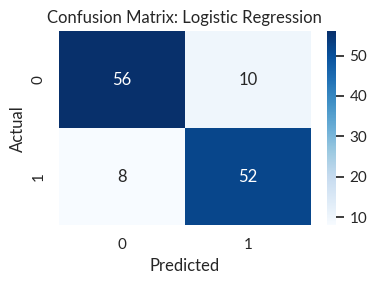

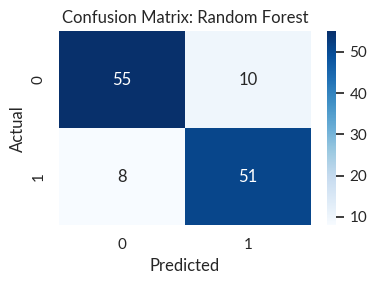

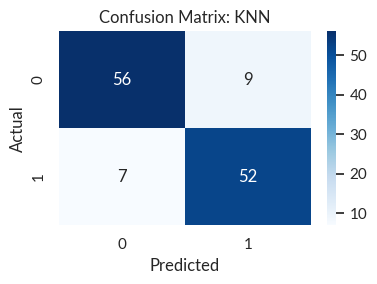

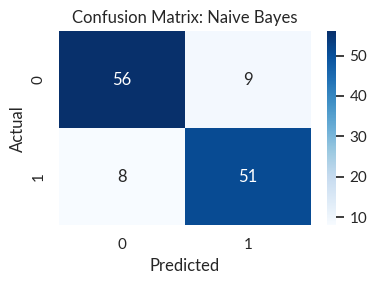

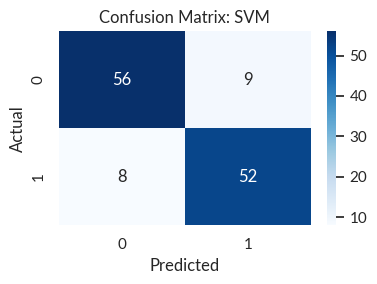

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns

# ========================
# 1. Prepare the dataset
# ========================

# `df` is already cleaned and NaNs/Cholesterol = 0 removed

# Encode categorical variables if needed
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# Save original sex column for fairness analysis
sex_column = df["Sex"].values

# Setting random state
random_state = 42
np.random.seed(random_state)

# ========================
# 2. Define the models
# ========================

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=random_state),
    "Random Forest": RandomForestClassifier(random_state=random_state),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=random_state),
}


# ========================
# 3. Cross-Validation: Train, Predict & Evaluate
# ========================

kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=random_state)
results = []

for name, model in models.items():
    acc_scores = []
    tpr_scores = []
    tpr_male_list = []
    tpr_female_list = []
    eod_list = []
    all_cms = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        sex_train, sex_test = sex_column[train_index], sex_column[test_index]

        # Scale if needed
        if name in ["Logistic Regression", "KNN", "SVM"]:
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        tpr = cm[1,1] / (cm[1,0] + cm[1,1]) if (cm[1,0] + cm[1,1]) > 0 else 0

        male_mask = sex_test == "M"
        female_mask = sex_test == "F"

        tpr_male = np.sum((y_test[male_mask] == 1) & (y_pred[male_mask] == 1)) / np.sum(y_test[male_mask] == 1)
        tpr_female = np.sum((y_test[female_mask] == 1) & (y_pred[female_mask] == 1)) / np.sum(y_test[female_mask] == 1)
        eod = tpr_male - tpr_female

        acc_scores.append(acc)
        tpr_scores.append(tpr)
        tpr_male_list.append(tpr_male)
        tpr_female_list.append(tpr_female)
        eod_list.append(eod)
        all_cms.append(cm)

    # Average confusion matrix
    avg_cm = np.mean(all_cms, axis=0).round().astype(int)

    results.append({
        "Model": name,
        "Mean Accuracy": np.mean(acc_scores),
        "Mean General TPR": np.mean(tpr_scores),
        "Mean Male TPR": np.mean(tpr_male_list),
        "Mean Female TPR": np.mean(tpr_female_list),
        "Mean EOD (Male - Female)": np.mean(eod_list),
        "Std Accuracy": np.std(acc_scores),
        "Std General TPR": np.std(tpr_scores),
        "Std Male TPR": np.std(tpr_male_list),
        "Std Female TPR": np.std(tpr_female_list),
        "Std EOD (Male - Female)": np.std(eod_list),
        "Confusion Matrix": avg_cm

    })

# ========================
# 4. Show Results
# ========================

# Display as dataframe
results_df = pd.DataFrame(results).drop(columns=["Confusion Matrix"])
print("Summary Metrics:")
display(results_df)

print("Last Fold's confusion matrices:")
# visualize confusion matrices
for res in results:
    plt.figure(figsize=(4, 3))
    sns.heatmap(res["Confusion Matrix"], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {res['Model']}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

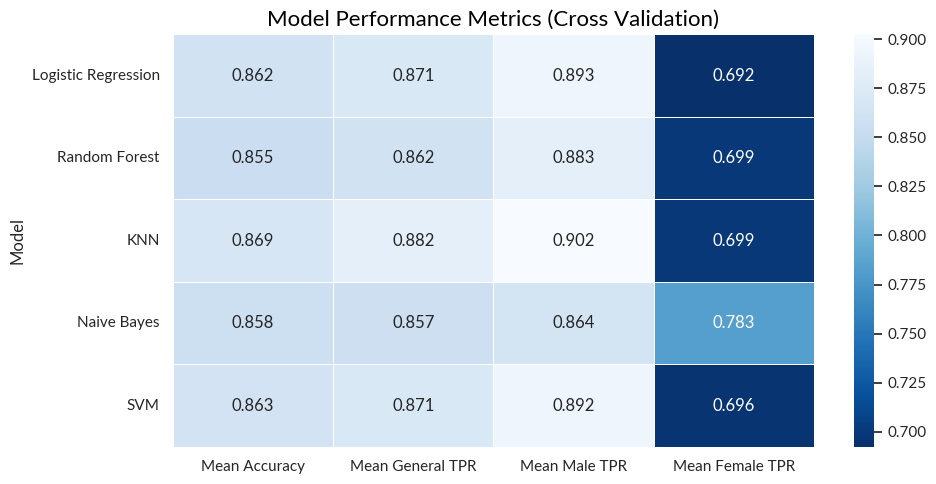

In [10]:
plt.figure(figsize=(10, 5))
performance_metrics = ["Mean Accuracy", "Mean General TPR", "Mean Male TPR", "Mean Female TPR"]
performance_df = results_df.set_index("Model")[performance_metrics]

sns.heatmap(performance_df, annot=True, fmt=".3f", cmap="Blues_r", linewidths=0.5, cbar=True)
plt.title("Model Performance Metrics (Cross Validation)", fontsize=16, color='black', weight='bold')
plt.tight_layout()
plt.show()


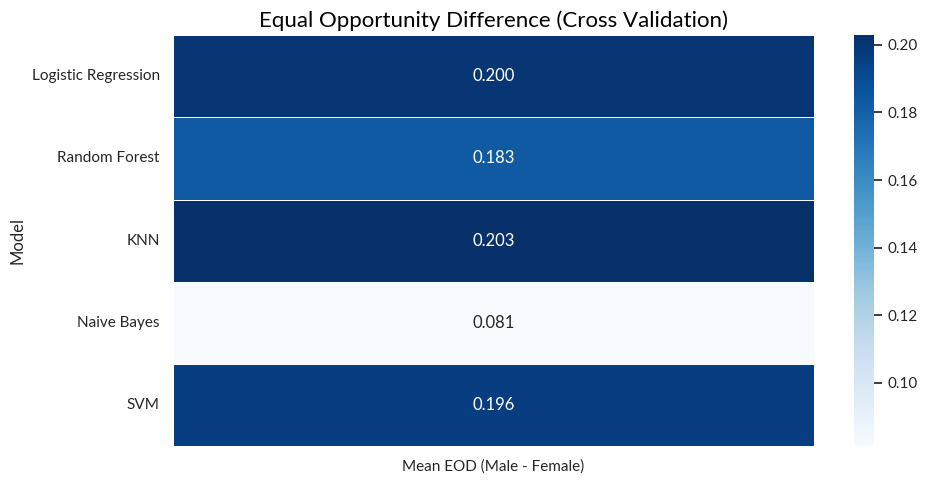

In [11]:
plt.figure(figsize=(10, 5))
performance_metrics = ["Mean EOD (Male - Female)"]
performance_df = results_df.set_index("Model")[performance_metrics]

sns.heatmap(performance_df, annot=True, fmt=".3f", cmap="Blues", linewidths=0.5, cbar=True)
plt.title("Equal Opportunity Difference (Cross Validation)", fontsize=16, color='black', weight='bold')
plt.tight_layout()
plt.show()


In [12]:
results_df_BEFORE = results_df.copy()

## Exploratory Error Analysis

Top Feature Importances (Random Forest):


,Feature,Importance
14,ST_Slope_Up,0.156145
5,Oldpeak,0.125290
13,ST_Slope_Flat,0.115686
4,MaxHR,0.107761
12,ExerciseAngina_Y,0.100475
0,Age,0.089092
2,Cholesterol,0.077043
1,RestingBP,0.073215
6,Sex_M,0.042372
7,ChestPainType_ATA,0.035140


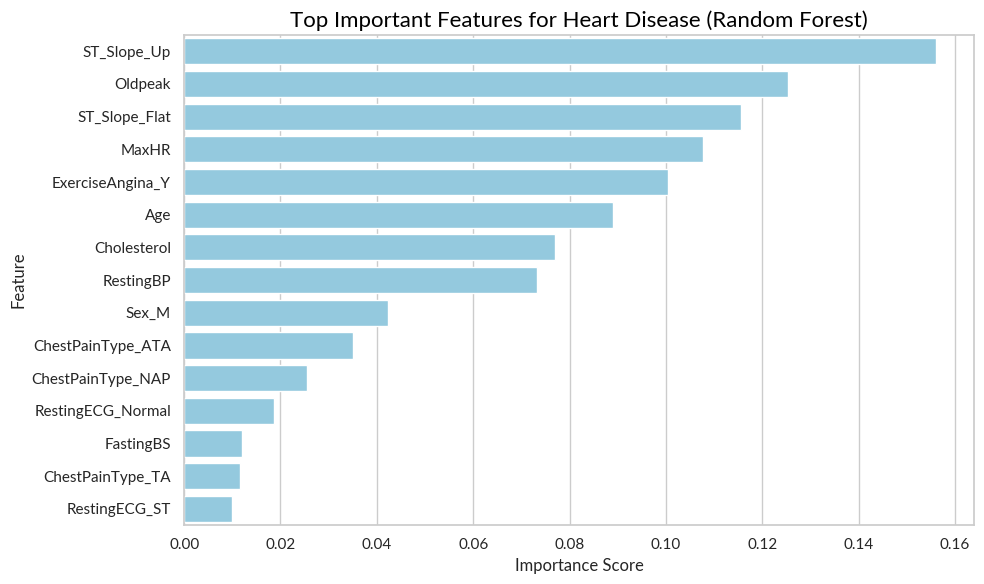

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Set random state for reproducibility
random_state = 42

# Separate features and target
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# Fit model to full data (use scaled or unscaled — RF doesn't need scaling)
rf = RandomForestClassifier(n_estimators=300, random_state=random_state)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create DataFrame for easy viewing/sorting
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display top features
print("Top Feature Importances (Random Forest):")
display(importance_df.head(10))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x="Importance", y="Feature", color='skyblue')
plt.title("Top Important Features for Heart Disease (Random Forest)", fontsize=16, color='black', weight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [14]:
import shap

# Create SHAP explainer for tree-based model
explainer = shap.TreeExplainer(rf)

# Compute SHAP values
shap_values = explainer.shap_values(X)

<ipython-input-15-a0280be2776b>:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:, :, 1], X)  # Class 1


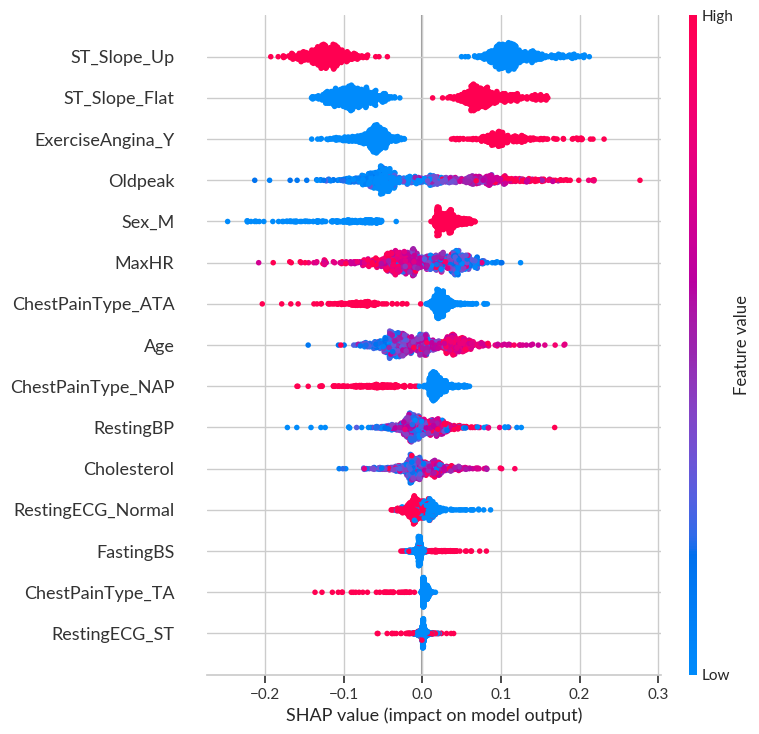

In [15]:
shap.summary_plot(shap_values[:, :, 1], X)  # Class 1

## Adversarial Testing

In [16]:
# Filter patients with heart disease
heart_disease_df = df[df['HeartDisease'] == 1]

# Get the most common values (mode) for each feature
most_common_values = heart_disease_df.mode().iloc[0]

# Drop the target column to keep only features
most_common_features = most_common_values.drop('HeartDisease')

# Convert to a single-row DataFrame for classifier input
example_input = pd.DataFrame([most_common_features])

# Show the ideal input
print("Ideal input for Heart Disease:")

print(example_input)

Ideal input for Heart Disease:
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0  58.0   M           ASY      140.0        282.0        0.0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  
0    140              Y      0.0     Flat  


In [17]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Define the base (most common) patient
heart_disease_df = df[df['HeartDisease'] == 1]
most_common_values = heart_disease_df.mode().iloc[0]
most_common_features = most_common_values.drop('HeartDisease')
base_input = pd.DataFrame([most_common_features])

# Step 2: Create test scenarios
scenarios = {
    "Female, Age 18": base_input.assign(Sex="F", Age=18),
    "Female, Age 58": base_input.assign(Sex="F"),
    "Female, Age 80": base_input.assign(Sex="F", Age=80),
    "Male, Age 18": base_input.assign(Age=18),
    "Male, Age 58": base_input.copy(),
    "Male, Age 80": base_input.assign(Age=80),

}

# Step 3: Predict each scenario with all models
results = []

for scenario_name, example_input in scenarios.items():
    # Encode and align columns
    example_encoded = pd.get_dummies(example_input)
    example_encoded = example_encoded.reindex(columns=X.columns, fill_value=0)

    for name, model in models.items():
        model_clone = clone(model)
        X_train_final = X.copy()

        if name in ["Logistic Regression", "KNN", "SVM"]:
            scaler = StandardScaler()
            X_train_final = scaler.fit_transform(X_train_final)
            model_clone.fit(X_train_final, y)

            example_scaled = scaler.transform(example_encoded)
            prediction = model_clone.predict(example_scaled)[0]
            proba = model_clone.predict_proba(example_scaled)[0][1]
        else:
            model_clone.fit(X_train_final, y)
            prediction = model_clone.predict(example_encoded)[0]
            proba = model_clone.predict_proba(example_encoded)[0][1]

        # Store results
        results.append({
            "Scenario": scenario_name,
            "Model": name,
            "Prediction": prediction,
            "Probability": proba
        })

# Step 4: Create a DataFrame with all results
results_df = pd.DataFrame(results)

# Step 5: Show the results
results_df

,Scenario,Model,Prediction,Probability
0,"Female, Age 18",Logistic Regression,0,0.395003
1,"Female, Age 18",Random Forest,1,0.740000
2,"Female, Age 18",KNN,1,0.600000
3,"Female, Age 18",Naive Bayes,1,0.628592
4,"Female, Age 18",SVM,1,0.620245
5,"Female, Age 58",Logistic Regression,1,0.689816
6,"Female, Age 58",Random Forest,1,0.870000
7,"Female, Age 58",KNN,1,1.000000
8,"Female, Age 58",Naive Bayes,1,0.983603
9,"Female, Age 58",SVM,1,0.828476


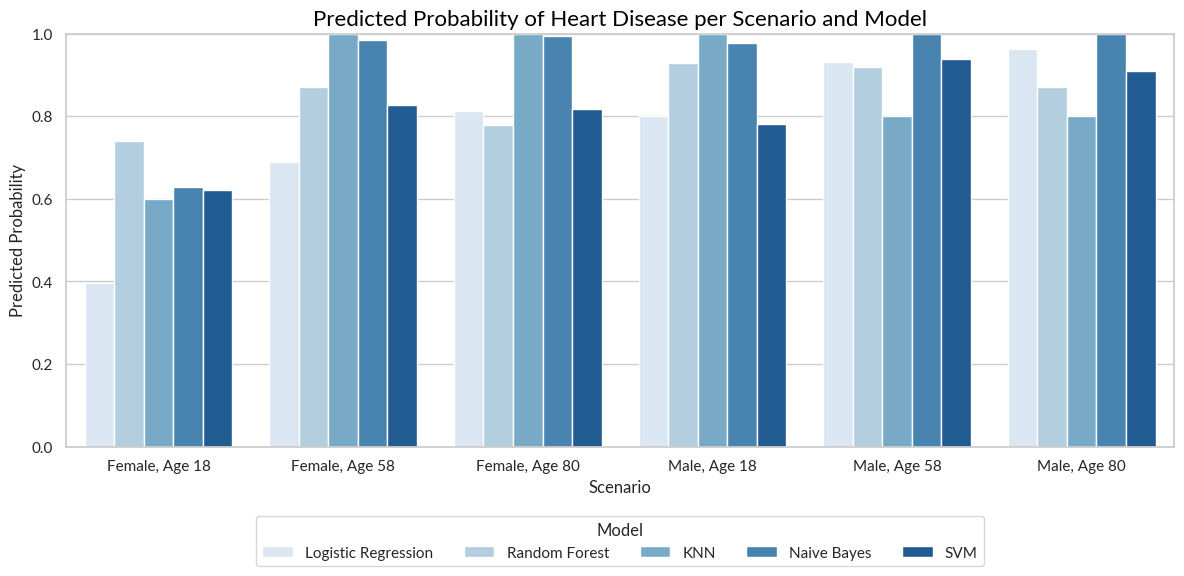

In [18]:
# Prepare the data for seaborn
plot_df = results_df.copy()

# Set seaborn style
sns.set(style="whitegrid")

set_lato_font()

# Create the barplot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=plot_df,
    x="Scenario",
    y="Probability",
    hue="Model",
    palette="Blues"
)

# Customize plot
plt.title("Predicted Probability of Heart Disease per Scenario and Model", fontsize=16, color='black', weight='bold')
plt.ylabel("Predicted Probability")
plt.ylim(0, 1)
plt.xlabel("Scenario")

# Place the legend horizontally behind the plot
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles, labels, title="Model", loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(labels), frameon=True)

plt.tight_layout()
plt.show()


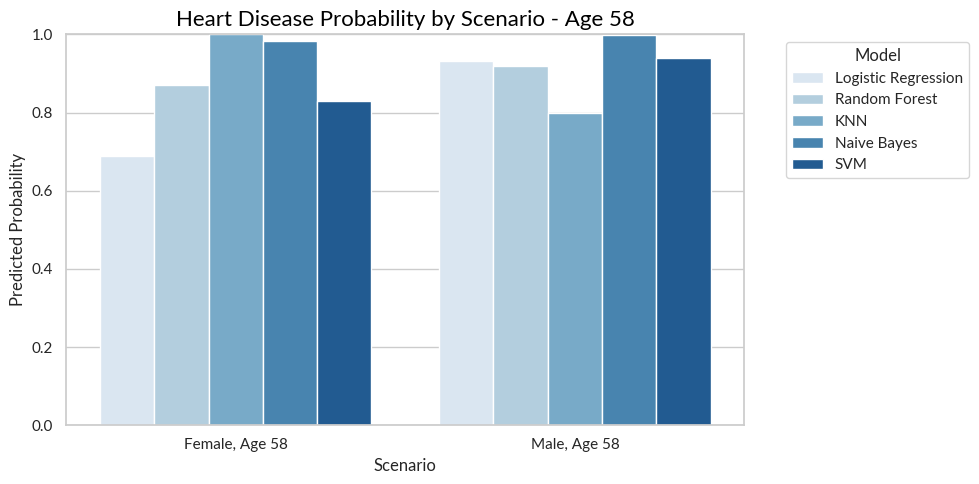

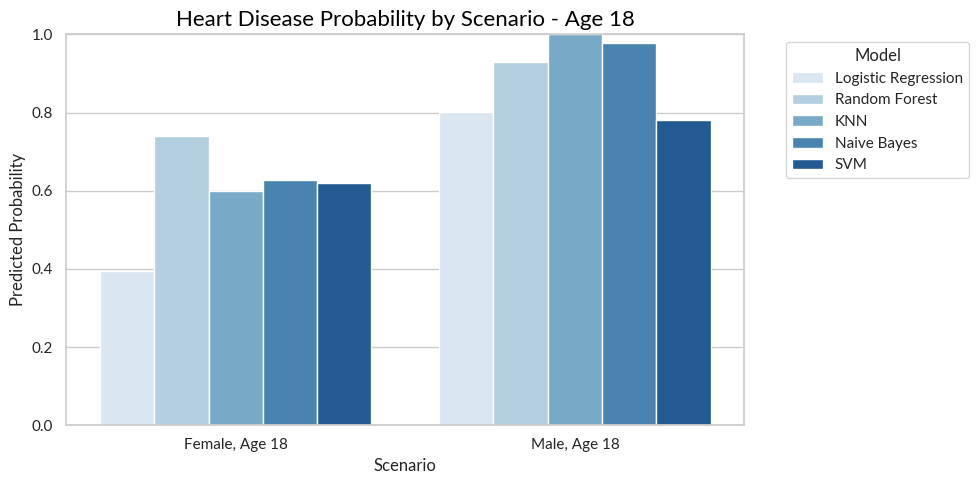

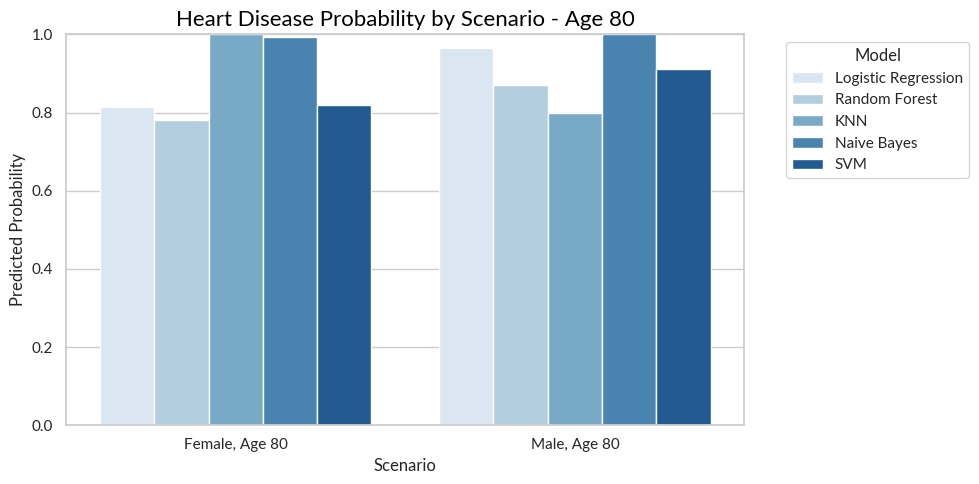

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the scenario pairs
scenario_groups = {
    "Age 58": ["Male, Age 58", "Female, Age 58"],
    "Age 18": ["Male, Age 18", "Female, Age 18"],
    "Age 80": ["Male, Age 80", "Female, Age 80"],
}

# Set seaborn style
sns.set(style="whitegrid")

set_lato_font()

# Plot each group
for group_title, scenarios_in_group in scenario_groups.items():
    subset = results_df[results_df["Scenario"].isin(scenarios_in_group)]

    plt.figure(figsize=(10, 5))
    ax = sns.barplot(
        data=subset,
        x="Scenario",
        y="Probability",
        hue="Model",
        palette="Blues"
    )

    plt.title(f"Heart Disease Probability by Scenario - {group_title}", fontsize=16, color='black', weight='bold')
    plt.ylabel("Predicted Probability")
    plt.ylim(0, 1)
    plt.xlabel("Scenario")
    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


## Reweighting

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClas

Summary Metrics:


,Model,Mean Accuracy,Mean General TPR,Mean Male TPR,Mean Female TPR,Mean EOD (Male - Female),Std Accuracy,Std General TPR,Std Male TPR,Std Female TPR,Std EOD (Male - Female)
0,Logistic Regression,0.851172,0.856733,0.864255,0.782738,0.081517,0.030570,0.046476,0.041073,0.156498,0.134724
1,Random Forest,0.578000,0.520386,0.516347,0.530754,-0.014406,0.083893,0.127284,0.147640,0.158770,0.261975
2,SVM,0.855183,0.862382,0.863957,0.827381,0.036576,0.026142,0.031447,0.036045,0.154533,0.163752


Last Fold's confusion matrices:


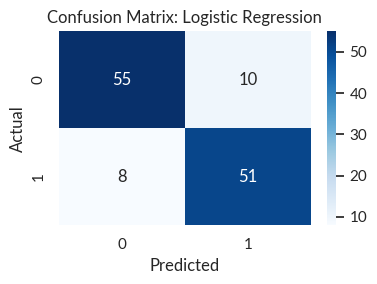

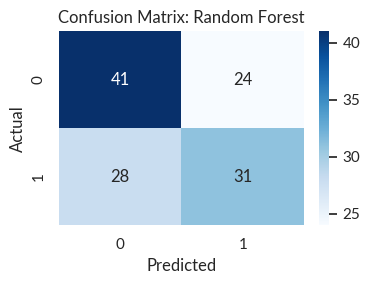

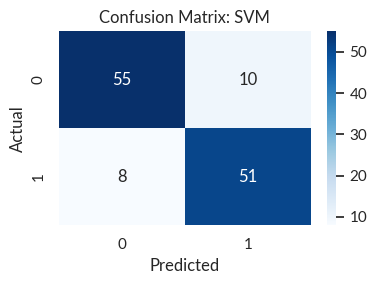

In [21]:
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns

# ========================
# 1. Prepare the dataset
# ========================

# `df` is already cleaned and NaNs/Cholesterol = 0 removed

# Encode categorical variables if needed
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# Save original sex column for fairness analysis
sex_column = df["Sex"].values

# Setting random state
random_state = 42
np.random.seed(random_state)

# ========================
# 2. Define the models
# ========================

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=random_state),
    "Random Forest": RandomForestClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier(),
    #"Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=random_state),
}


# ========================
# 3. Cross-Validation: Train, Predict & Evaluate
# ========================

kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=random_state)
results = []

for name, model in models.items():
    acc_scores = []
    tpr_scores = []
    tpr_male_list = []
    tpr_female_list = []
    eod_list = []
    all_cms = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        sex_train, sex_test = sex_column[train_index], sex_column[test_index]

        # Scale if needed
        if name in ["Logistic Regression", "KNN", "SVM"]:
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

        # Convert sex to binary (M = 1, F = 0) if not already
        sex_train_bin = np.where(sex_train == "M", 1, 0)
        sex_test_bin = np.where(sex_test == "M", 1, 0)

        # Build DataFrames for aif360
        X_train_df = pd.DataFrame(X_train, columns=X.columns)
        X_train_df["Sex"] = sex_train_bin
        y_train_df = pd.DataFrame(y_train.values, columns=["HeartDisease"])

        X_test_df = pd.DataFrame(X_test, columns=X.columns)
        X_test_df["Sex"] = sex_test_bin
        y_test_df = pd.DataFrame(y_test.values, columns=["HeartDisease"])

        # Combine features and labels for training
        train_combined = pd.concat([X_train_df, y_train_df], axis=1)

        # Drop any rows with missing values (NaNs)
        train_combined = train_combined.dropna()

        # Re-split features and labels after cleaning
        X_train_df = train_combined.drop(columns=["HeartDisease"])
        y_train_df = train_combined[["HeartDisease"]]


        # Create BinaryLabelDataset
        train_bld = BinaryLabelDataset(
            favorable_label=1,
            unfavorable_label=0,
            df=pd.concat([X_train_df, y_train_df], axis=1),
            label_names=["HeartDisease"],
            protected_attribute_names=["Sex"]
        )

        # Apply reweighing
        rw = Reweighing(
            privileged_groups=[{"Sex": 1}],
            unprivileged_groups=[{"Sex": 0}]
        )
        train_rw = rw.fit_transform(train_bld)

        # Extract reweighted features and weights
        X_train_rw = pd.DataFrame(train_rw.features, columns=train_rw.feature_names)
        X_train_rw = X_train_rw.drop(columns=["Sex"]).values  # Remove protected attribute

        y_train_rw = train_rw.labels.ravel()
        sample_weights = train_rw.instance_weights

        # Fit model using sample weights
        model.fit(X_train_rw, y_train_rw, sample_weight=sample_weights)

        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        tpr = cm[1,1] / (cm[1,0] + cm[1,1]) if (cm[1,0] + cm[1,1]) > 0 else 0

        male_mask = sex_test == "M"
        female_mask = sex_test == "F"

        tpr_male = np.sum((y_test[male_mask] == 1) & (y_pred[male_mask] == 1)) / np.sum(y_test[male_mask] == 1)
        tpr_female = np.sum((y_test[female_mask] == 1) & (y_pred[female_mask] == 1)) / np.sum(y_test[female_mask] == 1)
        eod = tpr_male - tpr_female

        acc_scores.append(acc)
        tpr_scores.append(tpr)
        tpr_male_list.append(tpr_male)
        tpr_female_list.append(tpr_female)
        eod_list.append(eod)
        all_cms.append(cm)

    # Average confusion matrix
    avg_cm = np.mean(all_cms, axis=0).round().astype(int)

    results.append({
        "Model": name,
        "Mean Accuracy": np.mean(acc_scores),
        "Mean General TPR": np.mean(tpr_scores),
        "Mean Male TPR": np.mean(tpr_male_list),
        "Mean Female TPR": np.mean(tpr_female_list),
        "Mean EOD (Male - Female)": np.mean(eod_list),
        "Std Accuracy": np.std(acc_scores),
        "Std General TPR": np.std(tpr_scores),
        "Std Male TPR": np.std(tpr_male_list),
        "Std Female TPR": np.std(tpr_female_list),
        "Std EOD (Male - Female)": np.std(eod_list),
        "Confusion Matrix": avg_cm

    })

# ========================
# 4. Show Results
# ========================

# Display as dataframe
results_df_AFTER = pd.DataFrame(results).drop(columns=["Confusion Matrix"])
print("Summary Metrics:")
display(results_df_AFTER)

print("Last Fold's confusion matrices:")
# Optionally: visualize confusion matrices
for res in results:
    plt.figure(figsize=(4, 3))
    sns.heatmap(res["Confusion Matrix"], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {res['Model']}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


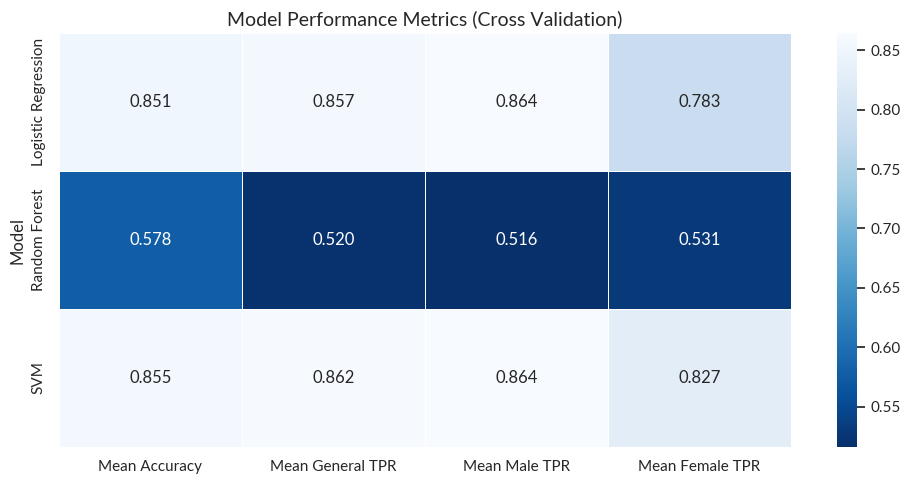

In [22]:
plt.figure(figsize=(10, 5))
performance_metrics = ["Mean Accuracy", "Mean General TPR", "Mean Male TPR", "Mean Female TPR"]
performance_df = results_df_AFTER.set_index("Model")[performance_metrics]

sns.heatmap(performance_df, annot=True, fmt=".3f", cmap="Blues_r", linewidths=0.5, cbar=True)
plt.title("Model Performance Metrics (Cross Validation)", fontsize=14)
plt.tight_layout()
plt.show()

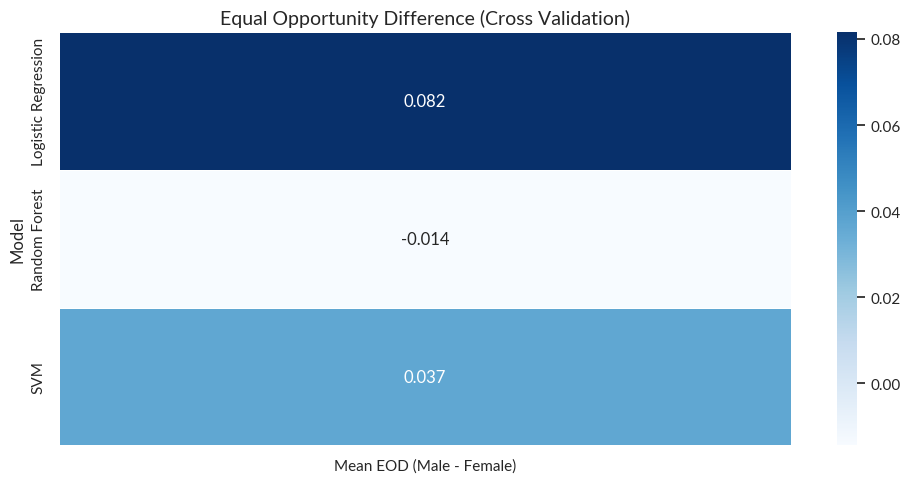

In [23]:
plt.figure(figsize=(10, 5))
performance_metrics = ["Mean EOD (Male - Female)"]
performance_df = results_df_AFTER.set_index("Model")[performance_metrics]

sns.heatmap(performance_df, annot=True, fmt=".3f", cmap="Blues", linewidths=0.5, cbar=True)
plt.title("Equal Opportunity Difference (Cross Validation)", fontsize=14)
plt.tight_layout()
plt.show()


In [24]:
results_df_AFTER

,Model,Mean Accuracy,Mean General TPR,Mean Male TPR,Mean Female TPR,Mean EOD (Male - Female),Std Accuracy,Std General TPR,Std Male TPR,Std Female TPR,Std EOD (Male - Female)
0,Logistic Regression,0.851172,0.856733,0.864255,0.782738,0.081517,0.030570,0.046476,0.041073,0.156498,0.134724
1,Random Forest,0.578000,0.520386,0.516347,0.530754,-0.014406,0.083893,0.127284,0.147640,0.158770,0.261975
2,SVM,0.855183,0.862382,0.863957,0.827381,0.036576,0.026142,0.031447,0.036045,0.154533,0.163752


In [25]:
results_df_BEFORE

,Model,Mean Accuracy,Mean General TPR,Mean Male TPR,Mean Female TPR,Mean EOD (Male - Female),Std Accuracy,Std General TPR,Std Male TPR,Std Female TPR,Std EOD (Male - Female)
0,Logistic Regression,0.861903,0.870810,0.892635,0.692460,0.200175,0.021703,0.048394,0.048991,0.124890,0.116600
1,Random Forest,0.855151,0.862147,0.882771,0.699405,0.183367,0.025807,0.043278,0.033574,0.209372,0.199069
2,KNN,0.868613,0.882062,0.902377,0.699405,0.202972,0.022753,0.046601,0.045147,0.232924,0.224982
3,Naive Bayes,0.857860,0.856733,0.863838,0.782738,0.081100,0.028781,0.037505,0.034798,0.156498,0.152520
4,SVM,0.863237,0.870810,0.892405,0.696429,0.195976,0.022497,0.042041,0.045699,0.153613,0.164916


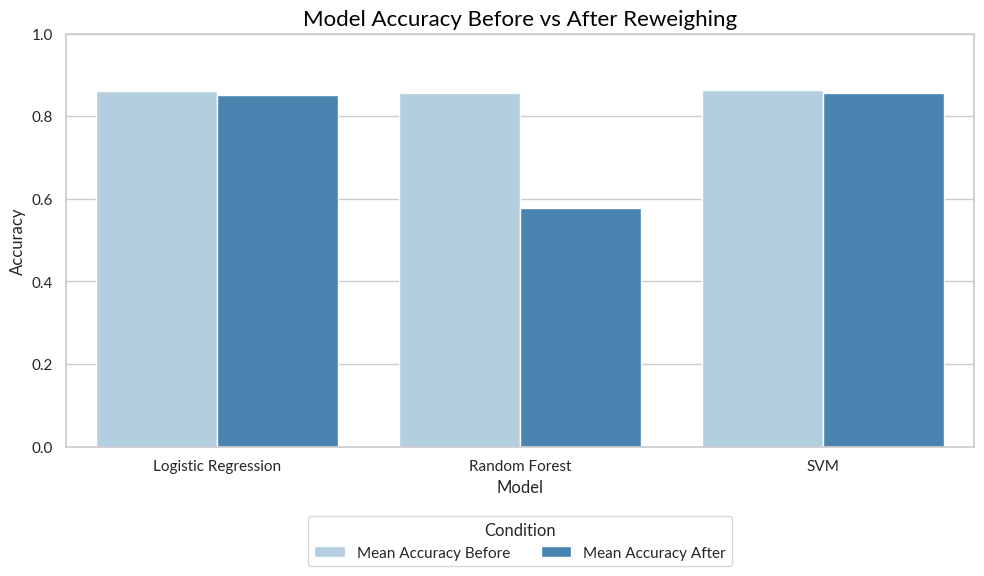

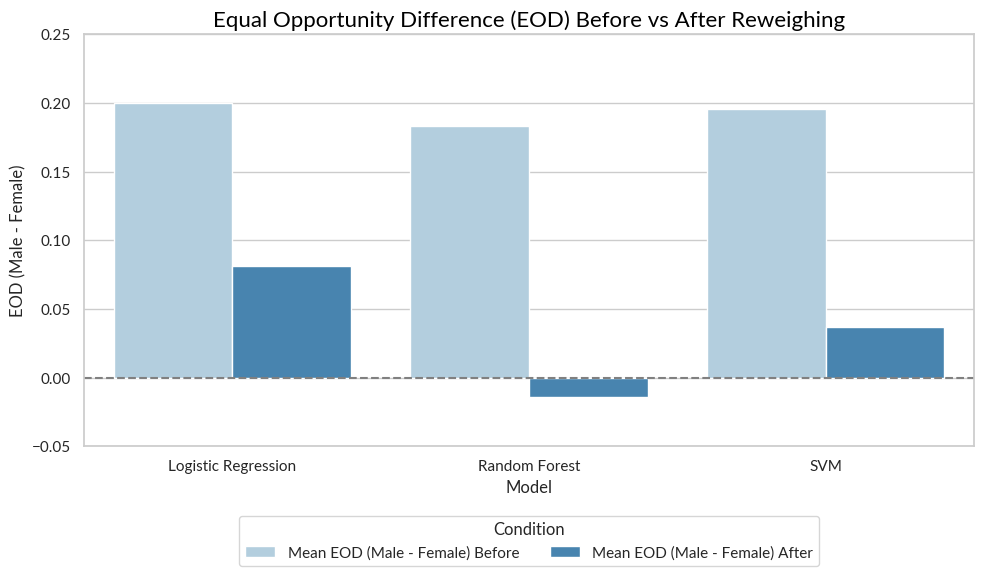

In [26]:
# Merge the two result DataFrames
comparison_df = results_df_BEFORE[["Model", "Mean Accuracy", "Mean EOD (Male - Female)"]].merge(
    results_df_AFTER[["Model", "Mean Accuracy", "Mean EOD (Male - Female)"]],
    on="Model",
    suffixes=(" Before", " After")
).round(4)

# Plot: Accuracy Before vs After
plt.figure(figsize=(10, 6))
df_long_acc = comparison_df.melt(id_vars="Model",
                                 value_vars=["Mean Accuracy Before", "Mean Accuracy After"],
                                 var_name="Condition", value_name="Accuracy")
sns.barplot(data=df_long_acc, x="Model", y="Accuracy", hue="Condition", palette="Blues")
plt.title("Model Accuracy Before vs After Reweighing", fontsize=16, color='black', weight='bold')

# Adjust legend to be horizontal and below the plot
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title="Condition", loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(labels), frameon=True)

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot: EOD Before vs After
plt.figure(figsize=(10, 6))
df_long_eod = comparison_df.melt(id_vars="Model",
                                 value_vars=["Mean EOD (Male - Female) Before", "Mean EOD (Male - Female) After"],
                                 var_name="Condition", value_name="EOD")
sns.barplot(data=df_long_eod, x="Model", y="EOD", hue="Condition", palette="Blues")
plt.axhline(0, color="gray", linestyle="--")
plt.title("Equal Opportunity Difference (EOD) Before vs After Reweighing", fontsize=16, color='black', weight='bold')
plt.ylabel("EOD (Male - Female)")

# Adjust legend to be horizontal and below the plot
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title="Condition", loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(labels), frameon=True)

plt.ylim(-0.05, 0.25)
plt.tight_layout()
plt.show()
